In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from slugify import slugify

In [4]:
df = pd.read_json("output.json")

In [5]:
df.head(5)

,name,rating,date,text,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Aircraft,Food & Beverages,Inflight Entertainment,Wifi & Connectivity
0,N Hancock,1.0,2023-07-18,Customer Service does not exist. One world eme...,Family Leisure,Business Class,London to Rhodes,July 2023,1.0,1.0,1.0,1,no,NaN,NaN,NaN,NaN
1,Steven Hodgson,9.0,2023-07-17,"Another really great pair of flights, on time,...",Family Leisure,Business Class,Newcastle to Las Vegas via Heathrow,June 2023,4.0,5.0,4.0,4,yes,A320 A350,4,3,NaN
2,John Grainger,1.0,2023-07-17,Our A380 developed a fault taxiing to the runw...,Solo Leisure,Business Class,London to Miami,June 2023,1.0,1.0,1.0,1,no,A380,1,NaN,NaN
3,K Robson,2.0,2023-07-16,Horrible airline. Does not care about their cu...,Solo Leisure,Economy Class,Amman to London,July 2023,3.0,1.0,4.0,3,no,A320Neo,1,1,3.0
4,Pradeep Madhavan,4.0,2023-07-09,My family and I have flown mostly on British A...,Couple Leisure,Premium Economy,Chennai to London,July 2023,3.0,2.0,4.0,1,no,Boeing 777,1,1,NaN


### Convert the column names into slugs

In [13]:
columns = df.columns.to_list()
mapper = {}
for column in columns:
    mapper[column] = slugify(column).replace("-","_")

In [16]:
df.rename(columns=mapper, inplace=True)

### Reorder the columns

In [24]:
desired_order = ['name',
 'rating',
 'date',
 'text',
 'aircraft',
 'type_of_traveller',
 'seat_type',
 'route',
 'date_flown',
 'seat_comfort',
 'cabin_staff_service',
 'ground_service',
 'value_for_money',
 'food_beverages',
 'inflight_entertainment',
 'wifi_connectivity',
 'recommended']

df = df[desired_order]

### Replace N/A values with NaN

In [26]:
df.replace(to_replace='N/A',value=np.nan, inplace=True)

In [27]:
df.dtypes

name                              object
rating                           float64
date                      datetime64[ns]
text                              object
aircraft                          object
type_of_traveller                 object
seat_type                         object
route                             object
date_flown                        object
seat_comfort                     float64
cabin_staff_service              float64
ground_service                   float64
value_for_money                  float64
food_beverages                   float64
inflight_entertainment           float64
wifi_connectivity                float64
recommended                       object
dtype: object

In [29]:
df.head(5)

,name,rating,date,text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,ground_service,value_for_money,food_beverages,inflight_entertainment,wifi_connectivity,recommended
0,N Hancock,1.0,2023-07-18,Customer Service does not exist. One world eme...,NaN,Family Leisure,Business Class,London to Rhodes,July 2023,1.0,1.0,1.0,1.0,NaN,NaN,NaN,no
1,Steven Hodgson,9.0,2023-07-17,"Another really great pair of flights, on time,...",A320 A350,Family Leisure,Business Class,Newcastle to Las Vegas via Heathrow,June 2023,4.0,5.0,4.0,4.0,4.0,3.0,NaN,yes
2,John Grainger,1.0,2023-07-17,Our A380 developed a fault taxiing to the runw...,A380,Solo Leisure,Business Class,London to Miami,June 2023,1.0,1.0,1.0,1.0,1.0,NaN,NaN,no
3,K Robson,2.0,2023-07-16,Horrible airline. Does not care about their cu...,A320Neo,Solo Leisure,Economy Class,Amman to London,July 2023,3.0,1.0,4.0,3.0,1.0,1.0,3.0,no
4,Pradeep Madhavan,4.0,2023-07-09,My family and I have flown mostly on British A...,Boeing 777,Couple Leisure,Premium Economy,Chennai to London,July 2023,3.0,2.0,4.0,1.0,1.0,1.0,NaN,no


### Analyse the data by segmenting it into aircrafts

In [30]:
aircraft_df = df[~df['aircraft'].isna()]

In [31]:
def extract_aircraft(aircraft):
    flights = re.findall(r'\w\d{3}Neo|\w\d{3}|Boeing\s\d{3}',aircraft)
    if len(flights) > 0:
        return flights[0]

In [32]:
aircraft_df['flight'] = aircraft_df['aircraft'].apply(extract_aircraft)

/var/folders/t0/prcwsryx44jd6j6zsp98vwch0000gn/T/ipykernel_4453/1185279754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aircraft_df['flight'] = aircraft_df['aircraft'].apply(extract_aircraft)


In [37]:
aircraft_df['flight'].value_counts()

Boeing 777    476
A320          393
Boeing 747    299
A380          185
Boeing 787    139
A319          128
A321          105
Boeing 767     48
A350           17
Boeing 737     12
B747            6
B777            5
A318            5
E190            3
2000            2
E170            2
A340            2
A321Neo         2
B190            1
B737            1
Boeing 744      1
A230            1
A330            1
Boeing 757      1
A322            1
A219            1
Boeing 777      1
A320Neo         1
B767            1
r170            1
Name: flight, dtype: int64

### Remove flights that have lower than 100 reviews

In [40]:
counts = aircraft_df['flight'].value_counts()
rows_to_drop = aircraft_df['flight'].isin(counts[counts < 100].index)
aircraft_df = aircraft_df[~rows_to_drop]
aircraft_df['flight'].value_counts()

Boeing 777    476
A320          393
Boeing 747    299
A380          185
Boeing 787    139
A319          128
A321          105
Name: flight, dtype: int64

In [130]:
median_rating_by_aircraft = aircraft_df.groupby('flight').median()
median_rating_by_aircraft

/var/folders/t0/prcwsryx44jd6j6zsp98vwch0000gn/T/ipykernel_4453/1369901542.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_rating_by_aircraft = aircraft_df.groupby('flight').median()


,rating,seat_comfort,cabin_staff_service,ground_service,value_for_money,food_beverages,inflight_entertainment,wifi_connectivity
flight,,,,,,,,
A319,6.0,3.0,4.0,3.0,3.0,3.0,3.0,1.0
A320,5.0,3.0,4.0,3.0,3.0,3.0,1.0,1.0
A321,5.0,3.0,4.0,3.0,3.0,3.0,1.5,1.0
A380,6.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0
Boeing 747,5.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0
Boeing 777,5.0,3.0,4.0,3.0,3.0,3.0,3.0,1.0
Boeing 787,7.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0


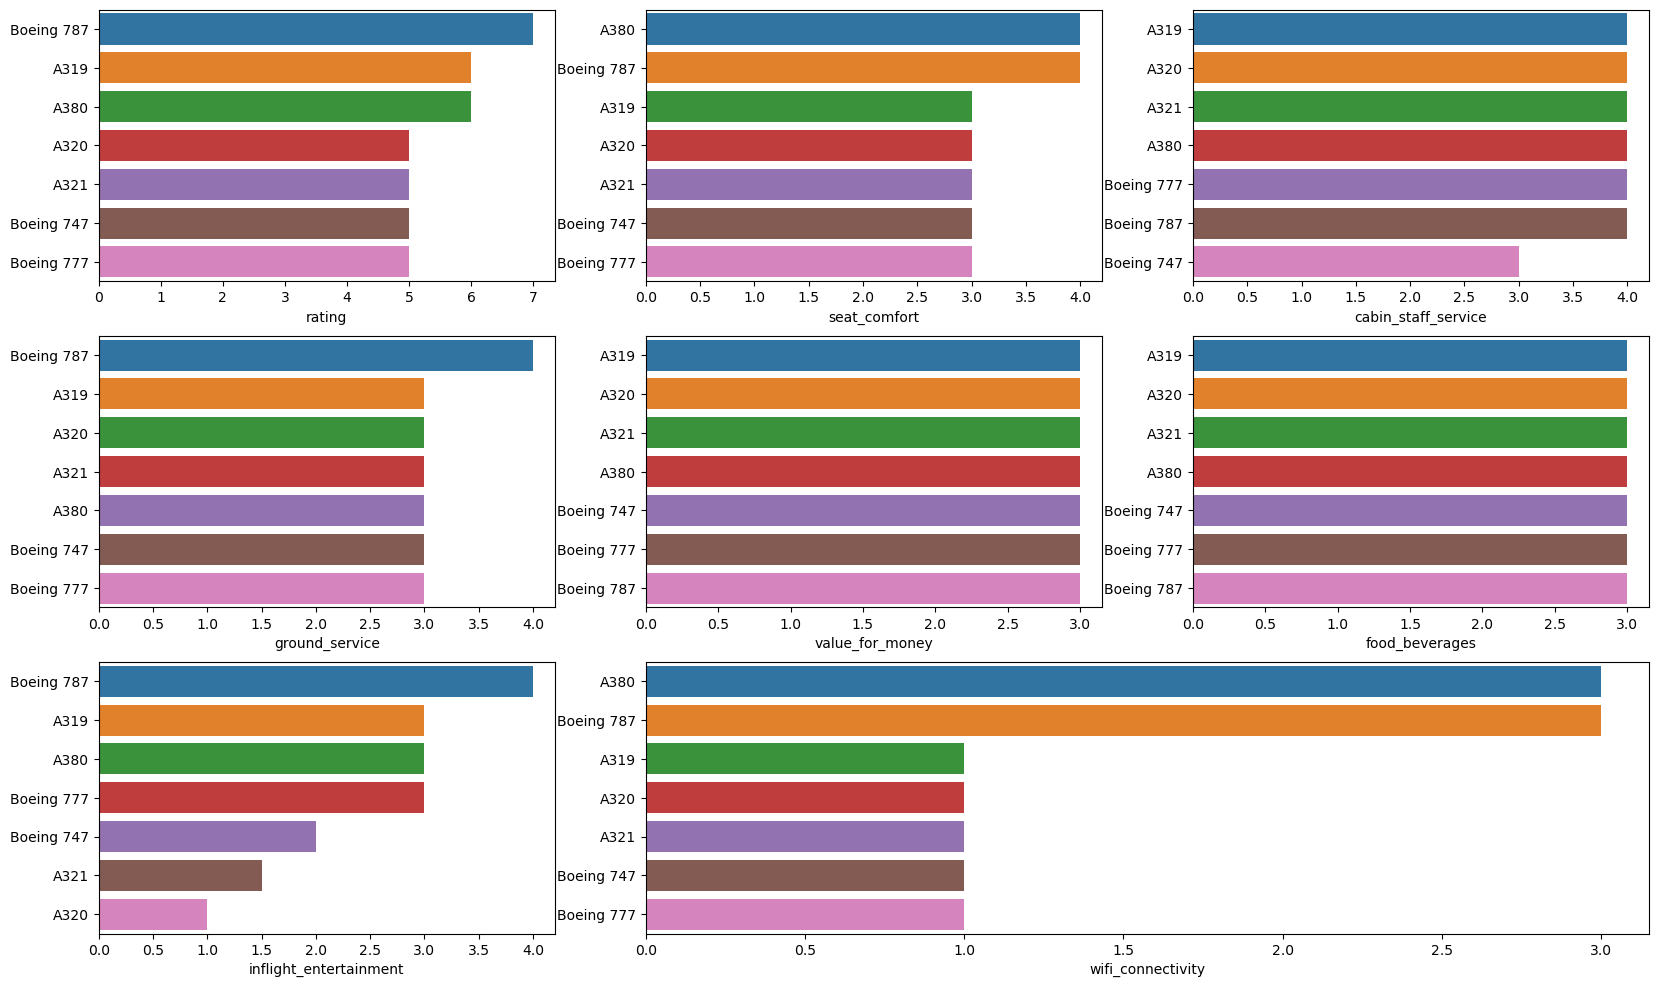

In [131]:
fig, axs = plt.subplot_mosaic([
    ['rating','seat_comfort','cabin_staff_service'],
    ['ground_service','value_for_money', 'food_beverages'],
    ['inflight_entertainment','wifi_connectivity','wifi_connectivity']

], figsize=(20,12))

for col in median_rating_by_aircraft.columns:
    sns.barplot(x = median_rating_by_aircraft[col].sort_values(ascending=False),y=median_rating_by_aircraft[col].sort_values(ascending=False).index, ax=axs[col])
    axs[col].set_ylabel('')

### Here we can see that the Boeing 787 flight rank higher in ratinngs in most of the  categories than other aircrafts